<a href="https://colab.research.google.com/github/nehagovekar/100_DAYS_OF_MACHINE_LEARNING/blob/main/ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [3]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
#read the dataset
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#convert the dataset into independent and dependent features
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
#feature engineering
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
geography.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


In [ ]:
X.drop(['Geography','Gender'],axis=1,inplace=True)

KeyError: "['Geography', 'Gender'] not found in axis"

In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
#splitting the dataset in train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
##part 2
#creating ANN
#tensorflow library, keras is a wrapper
#open sourced by google

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
#initialize ANN
classifier = Sequential()
#add input layer
classifier.add(Dense(units=11,activation='relu'))



In [ ]:
#adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [ ]:
#one more hidden layer, there are techniques on how many neurons can be added
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
#output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#import tensorflow
#learning ratea

In [ ]:
import tensorflow.keras.optimizers as optimizers
opt = optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#fit
model_hist= classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=10)

Epoch 1/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8562 - loss: 0.3402 - val_accuracy: 0.8482 - val_loss: 0.3572
Epoch 2/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8695 - loss: 0.3040 - val_accuracy: 0.8478 - val_loss: 0.3542
Epoch 3/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8529 - loss: 0.3406 - val_accuracy: 0.8459 - val_loss: 0.3809
Epoch 4/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8630 - loss: 0.3213 - val_accuracy: 0.8485 - val_loss: 0.3708
Epoch 5/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8631 - loss: 0.3242 - val_accuracy: 0.8542 - val_loss: 0.3599
Epoch 6/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8573 - loss: 0.3295 - val_accuracy: 0.8550 - val_loss: 0.3610
Epoch 7/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8687 - loss: 0.3131 - val_accuracy: 0.8497 - val_loss: 0.3649
Epoch 8/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8587 - loss: 0.3281 - val_accuracy: 0.

In [ ]:
#early stopping
import tensorflow as tf
#stop training when improvement stops
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model_hist= classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8574 - loss: 0.3369 - val_accuracy: 0.8440 - val_loss: 0.3706
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8552 - loss: 0.3355 - val_accuracy: 0.8493 - val_loss: 0.3707
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8665 - loss: 0.3092 - val_accuracy: 0.8478 - val_loss: 0.3647
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8627 - loss: 0.3160 - val_accuracy: 0.8463 - val_loss: 0.3839
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8543 - loss: 0.3267 - val_accuracy: 0.8372 - val_loss: 0.3615
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8542 - loss: 0.3307 - val_accuracy: 0.8425 - val_loss: 0.3975
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8572 - loss: 0.3210 - val_accuracy: 0.8444 - val_loss: 0.3782
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8629 - loss: 0.3086 - 

In [ ]:
#accuracy stagnant after some time, what to do then?
#1000 epochs-->early stopping
#when to decide number of epochs should stop?
model_hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

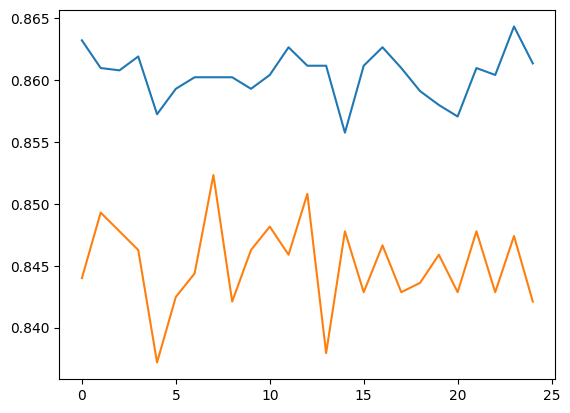

In [ ]:
#SUMMARY HISTORY FOR ACCURACY
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])

In [ ]:
y_pred = classifier.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
y_pred=(y_pred>0.5)

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[1570,   25],
       [ 259,  146]])

In [ ]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [ ]:
score

0.858

In [ ]:
#get the weights
classifier.get_weights()

[array([[-0.321474  ,  1.446182  , -0.14056106, -1.2712344 , -0.05088126,
          0.8805445 ,  0.40130234, -0.5651176 , -0.05502311, -0.79768676,
          0.84204805],
        [ 0.6668439 , -0.7996287 , -0.28057694,  0.03522182, -0.42707297,
         -4.826185  ,  2.5875733 , -2.687961  ,  3.4279041 , -3.0873418 ,
         -3.3359654 ],
        [ 0.565838  ,  1.6275953 ,  0.31523666,  1.3230692 ,  0.13204303,
          0.18090163, -0.7334069 ,  0.3161245 , -0.13112587, -0.5030212 ,
         -0.40705842],
        [-3.8275957 , -1.3167089 , -3.265755  ,  0.88258064,  0.7443198 ,
         -1.2169317 , -1.4312588 ,  2.3741784 ,  0.45240766, -0.10604515,
         -1.1862276 ],
        [ 1.2845495 ,  0.44038823, -4.1832576 , -0.7913387 ,  3.9216056 ,
          0.4821214 , -0.9567422 , -0.41345057, -0.30363986,  1.8349301 ,
         -0.8152443 ],
        [-0.0893249 , -0.2007187 , -0.5184375 ,  0.6261146 , -0.35706395,
         -1.1359333 , -0.36818913, -0.9248038 , -0.91540897, -0.0559343